In [1]:
import numpy as np
import pandas as pd
from FS import feature_select, delete_zero_and_var
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier  #KNN
from sklearn.linear_model import LogisticRegression  #Logistic Regression
from sklearn.tree import DecisionTreeClassifier  #Decision Tree
from sklearn.ensemble import RandomForestClassifier  #Random Forest
from sklearn.neural_network import MLPClassifier  #Neural Network
from sklearn.svm import SVC  #SVM
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve,classification_report
from sklearn.metrics import roc_auc_score as AUC

import matplotlib.pylab as plt
import numpy as np

In [2]:
# 读取cvs训练数据集
cvs_path = "./data/csv/Molecular_Descriptor_train.csv"
df = pd.read_csv(cvs_path, index_col=0)
cvs_path2 = "./data/csv/ADMET_train.csv"
df_admet = pd.read_csv(cvs_path2, index_col=0)


In [29]:
# 数据分割

X = df.drop(['SMILES', 'pIC50'], axis=1)
y1 = df_admet["Caco-2"]
y2 = df_admet["CYP3A4"]
y3 = df_admet["hERG"]
y4 = df_admet["HOB"]
y5 = df_admet["MN"]
print(X.shape, y1.shape)

(1974, 729) (1974,)


In [4]:
# 特征选择
no_zero_X = delete_zero_and_var(X, 0.005)  #输入
# 提取后的总训练集和选择的列Name
# X_train, X_test, y_train, y_test = train_test_split(no_zero_X, y2, test_size=0.2, random_state=0, shuffle=False)
print(no_zero_X)


最终剩余特征数 331
sum=0特征:  225 方差过小特征:  172
['ALogP', 'ALogp2', 'AMR', 'apol', 'nAtom', 'nHeavyAtom', 'nH', 'nB', 'nN', 'nP', 'nCl', 'nI', 'ATSc1', 'ATSc2', 'ATSc4', 'ATSc5', 'ATSm1', 'ATSm2', 'ATSm3', 'ATSm4', 'ATSm5', 'ATSp1', 'ATSp2', 'nBase', 'nBonds', 'nBonds2', 'nBondsS', 'nBondsS2', 'nBondsS3', 'nBondsD2', 'nBondsQ', 'bpol', 'C1SP2', 'VCH-4', 'SC-3', 'SC-6', 'SPC-4', 'SP-0', 'SP-1', 'SP-2', 'SP-3', 'VP-0', 'VP-1', 'VP-2', 'CrippenLogP', 'CrippenMR', 'ECCEN', 'nHBd', 'nwHBd', 'nHBa', 'nHBint2', 'nHBint3', 'nHBint5', 'nHBint6', 'nHBint7', 'nHBint8', 'nHBint9', 'nHBint10', 'nHdNH', 'nHsSH', 'nHsNH2', 'nHssNH', 'nHsNH3p', 'nHssNH2p', 'nHsssNHp', 'nHCsatu', 'nHmisc', 'nsLi', 'nssBe', 'nssssBem', 'nsBH2', 'nssBH', 'nsssB', 'nssssBm', 'nddC', 'ndssC', 'nsNH3p', 'nsNH2', 'nssNH2p', 'ndNH', 'nssNH', 'nsssNHp', 'nddsN', 'nssssNp', 'ndO', 'naOm', 'nsOm', 'nsSiH3', 'nssSiH2', 'nsssSiH', 'nssssSi', 'nsPH2', 'nssPH', 'nsssP', 'ndsssP', 'nddsP', 'nsssssP', 'nsSH', 'nssS', 'ndssS', 'nssssssS', 'nSm'

建立的SVM模型为： SVC(C=100, gamma=0.001)
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       143
           1       0.97      0.97      0.97       450

    accuracy                           0.95       593
   macro avg       0.94      0.94      0.94       593
weighted avg       0.95      0.95      0.95       593

正确： 566 错误： 27
准确率为： 0.954468802698145
精确率为： 0.9710467706013363
召回率为： 0.9688888888888889
F1值为： 0.9699666295884315


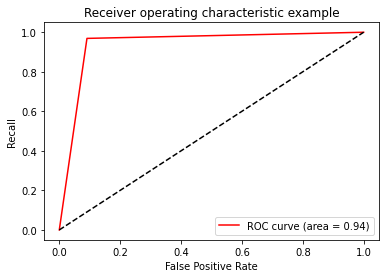

1


In [197]:
X_train, X_test, y_train, y_test = train_test_split(no_zero_X, y5, test_size=0.3, random_state=0, shuffle=True)
#标准化处理
scale = StandardScaler()
X_train_s = scale.fit_transform(X_train)
X_test_s = scale.fit_transform(X_test)

#建立SVM模型
svm = SVC(kernel="rbf", C=100, gamma=0.001).fit(X_train_s, y_train)
print("建立的SVM模型为：", svm)

y_pred = svm.predict(X_test_s)
print(classification_report(y_test, y_pred))
true = np.sum(y_pred == y_test)
print('正确：', true,"错误：",y_pred.shape[0] - true)

#参数
print('准确率为：',
      accuracy_score(y_test, y_pred))
print('精确率为：',
      precision_score(y_test, y_pred))
print('召回率为：',
      recall_score(y_test, y_pred))
print('F1值为：',
      f1_score(y_test, y_pred))

# ## 求出ROC曲线的x轴和y轴
FPR, recall, thresholds = roc_curve(y_test, y_pred)
area = AUC(y_test, y_pred)

# 画出ROC曲线
plt.figure()
plt.plot(FPR, recall, color='red'
         , label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# 为了让曲线不黏在图的边缘
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 利用ROC曲线找出最佳阀值
maxindex = (recall - FPR).tolist().index(max(recall - FPR))
print(thresholds[maxindex])  # -1.0860191749391461


In [14]:
X_train, X_test, y_train, y_test = train_test_split(no_zero_X, y1, test_size=0.3, random_state=0, shuffle=True)
#标准化处理
scale = StandardScaler()
X_train_s = scale.fit_transform(X_train)
X_test_s = scale.fit_transform(X_test)

best_score = 0
for gamma in [0.001, 0.01,1]:
    for c in [0.01, 0.1, 1, 10, 100]:
        # 对于每种参数可能的组合，进行一次训练
        svm = SVC(kernel="rbf",gamma=gamma, C=c)
        # 5 折交叉验证
        scores = cross_val_score(svm, X_train_s, y_train, cv=5)
        score = scores.mean()
        # 找到表现最好的参数
        if score > best_score:
            print(score)
            best_score = score
        best_parameters = {'gamma': gamma, "C": c}

# 使用最佳参数，构建新的模型
# best_parameters = {'gamma': 0.001, "C": 10}
svm = SVC(**best_parameters)

# 使用训练集和验证集进行训练 more data always resultd in good performance
svm.fit(X_train_s, y_train)

# evalyation 模型评估
test_score = svm.score(X_test_s, y_test)

print('Best socre:{:.2f}'.format(best_score))
print('Best parameters:{}'.format(best_parameters))
print('Best score on test set:{:.2f}'.format(test_score))

0.6198398995448124
0.8247710982054098
0.8754617276199446
0.8986396693350077
Best socre:0.90
Best parameters:{'gamma': 1, 'C': 100}
Best score on test set:0.62


In [184]:
# 网格搜索模块
X_train, X_test, y_train, y_test = train_test_split(no_zero_X, y5, test_size=0.3, random_state=0, shuffle=True)
#标准化处理
scale = StandardScaler()
X_train_s = scale.fit_transform(X_train)
X_test_s = scale.fit_transform(X_test)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3,1e-4,1e-5],
                     'C':[1e-3,1e-2,1e-1,1,10,100,1000]}
                     # 'C': range(10,1000,100)},
                    # {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
                    ]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
# 用训练集训练这个学习器 clf
clf.fit(X_train_s, y_train)

print("Best parameters set found on development set:")
print()

# 再调用 clf.best_params_ 就能直接得到最好的参数搭配结果
print(clf.best_params_)

Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


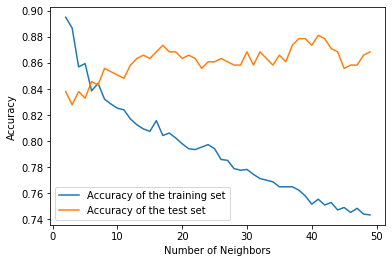

In [208]:
#----------KNN Classifier
X_train, X_test, y_train, y_test = train_test_split(no_zero_X, y1, test_size=0.2, random_state=0, shuffle=False)

training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(2, 50)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_setting, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

